In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
df = pd.read_csv('Heart_patient_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# checking the statistics of the numerical variables
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
# checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
# change missidentified features present in the dataset
df['hypertension'] = df['hypertension'].astype(object)
df['heart_disease'] = df['heart_disease'].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 428.2+ KB


<Axes: >

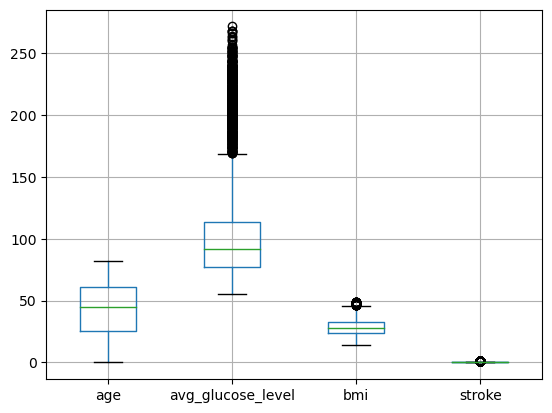

In [8]:
# check outliers present in the numerical columns
df.boxplot()

In [10]:
# missing values
df.isnull().sum()
# no missing value presnt in the data 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# create a copy of the dataframe to apply preprocessing technique
df1 = df.copy()

In [12]:
df1.skew()

# skewness represent the data points present outside the majourity space.

age                 -0.144001
hypertension         2.740377
heart_disease        3.896191
avg_glucose_level    1.587526
bmi                  0.371553
stroke               4.140942
dtype: float64

In [13]:
# transformation to treat outliers and to reduce the spead of data points
df1['avg_glucose_level'] = np.log(df1['avg_glucose_level'])

In [14]:
# split the X and Y columns to seperate indepentend and target variable
x = df1.drop('stroke', axis=1)
y = df1['stroke']

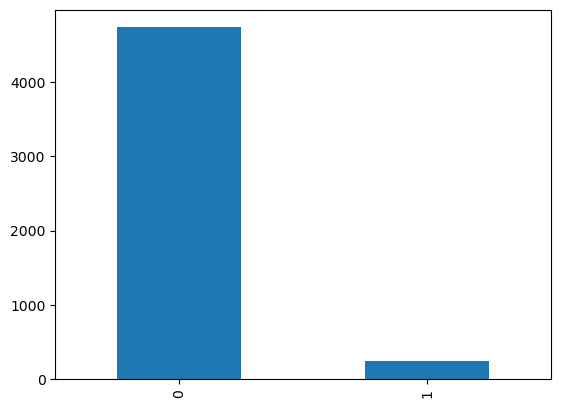

In [15]:
# check if the target column is balanced or not
df['stroke'].value_counts().plot(kind='bar')
plt.show()

# so clearly we can see it is not

In [16]:
# using oversampling method to balanced the labels in target columns.

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [17]:
x_resampled, y_resampled = oversampler.fit_resample(x,y)

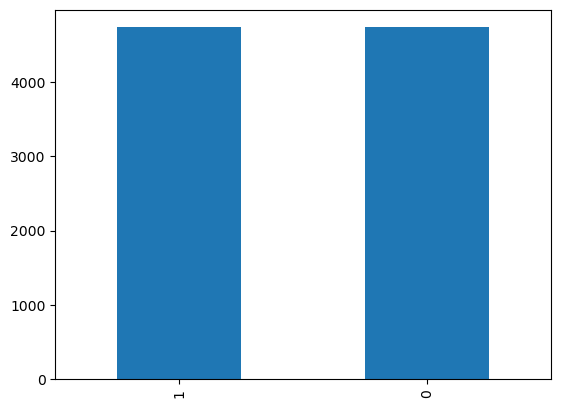

In [18]:
y_resampled.value_counts().plot(kind='bar')
plt.show()

In [19]:
# we need to treat numerical and categorical column differntly
x_num = x_resampled.select_dtypes(float)
x_cat = x_resampled.select_dtypes(object)

In [20]:
x_num.head()

,age,avg_glucose_level,bmi
0,67.0,5.432367,36.6
1,80.0,4.662684,32.5
2,49.0,5.143008,34.4
3,79.0,5.159745,24.0
4,81.0,5.226875,29.0


In [21]:
# scaling the numerical column to make the value of all variable to one scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num = pd.DataFrame(scaler.fit_transform(x_num), columns=x_num.columns)

In [22]:
x_num.head()

,age,avg_glucose_level,bmi
0,0.537544,1.766641,1.154981
1,1.121486,-0.050293,0.505859
2,-0.270991,1.083571,0.806671
3,1.076568,1.123081,-0.839881
4,1.166405,1.281551,-0.048269


In [23]:
x_cat.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
1,Male,0,1,Yes,Private,Rural,never smoked
2,Female,0,0,Yes,Private,Urban,smokes
3,Female,1,0,Yes,Self-employed,Rural,never smoked
4,Male,0,0,Yes,Private,Urban,formerly smoked


In [24]:
# treating the categorical data by
# one hot encoding

x_cat = pd.get_dummies(x_cat, drop_first= True)
x_cat.head()

,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,1,1,0,0,1,1,0,0
1,1,0,1,1,1,0,0,0,0,1,0
2,0,0,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,0,0,0,1,0
4,1,0,0,1,1,0,0,1,1,0,0


In [25]:
# combine the treated features
x_com = pd.concat([x_num, x_cat], axis=1)
x_com.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.537544,1.766641,1.154981,1,0,1,1,1,0,0,1,1,0,0
1,1.121486,-0.050293,0.505859,1,0,1,1,1,0,0,0,0,1,0
2,-0.270991,1.083571,0.806671,0,0,0,1,1,0,0,1,0,0,1
3,1.076568,1.123081,-0.839881,0,1,0,1,0,1,0,0,0,1,0
4,1.166405,1.281551,-0.048269,1,0,0,1,1,0,0,1,1,0,0


In [27]:
# split into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_com, y_resampled, random_state=42, test_size=0.2)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7572, 14)
(1894, 14)
(7572,)
(1894,)


In [29]:
# train the model
# I am using Random forest because it uses ensemble method to predict the outcome

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [30]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = rf.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.9915522703273495

In [33]:
print(classification_report(y_test,y_pred))

# we need classifcation report to distiguish prediction between 0 and 1

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       946
           1       0.98      1.00      0.99       948

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



In [ ]:
# now the model is almost accurate so we can pass the new patient data and predict
# whether they have heart stroke or not